# Training the dataset

### Importing the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Loading and preparing the data

In [2]:
data=pd.read_csv('../data/dataset.csv')
df=pd.DataFrame(data)
# cleaning the null and garbage values
df.dropna(inplace=True)
# adding genre mapping as logisticregression gave 14.83% accuracy and randomforestclassifier gave 23.03% accuracy
genre_mapping = {
    # Electronic & Dance
    'techno': 'Electronic', 'trance': 'Electronic', 'house': 'Electronic', 
    'chicago-house': 'Electronic', 'deep-house': 'Electronic', 'electro': 'Electronic',
    'electronic': 'Electronic', 'edm': 'Electronic', 'dubstep': 'Electronic',
    'breakbeat': 'Electronic', 'club': 'Electronic', 'dance': 'Electronic',
    'detroit-techno': 'Electronic', 'drum-and-bass': 'Electronic',
    'garage': 'Electronic', 'hardstyle': 'Electronic', 'idm': 'Electronic',
    'industrial': 'Electronic', 'minimal-techno': 'Electronic', 
    'post-dubstep': 'Electronic', 'progressive-house': 'Electronic',
    'work-out': 'Electronic',
    # Rock
    'rock': 'Rock', 'hard-rock': 'Rock', 'psych-rock': 'Rock', 'punk-rock': 'Rock',
    'alt-rock': 'Rock', 'alternative': 'Rock', 'british': 'Rock', 'goth': 'Rock',
    'grunge': 'Rock', 'indie': 'Rock', 'j-rock': 'Rock', 'rock-n-roll': 'Rock',
    'rockabilly': 'Rock', 'road-trip': 'Rock',
    # Metal
    'metal': 'Metal', 'heavy-metal': 'Metal', 'death-metal': 'Metal', 'black-metal': 'Metal',
    'grindcore': 'Metal', 'metal-misc': 'Metal', 'metalcore': 'Metal',
    # Punk & Emo
    'punk': 'Punk/Emo', 'emo': 'Punk/Emo', 'hardcore': 'Punk/Emo',
    # Pop
    'pop': 'Pop', 'synth-pop': 'Pop', 'power-pop': 'Pop', 'indie-pop': 'Pop',
    'cantopop': 'Pop', 'happy': 'Pop', 'j-dance': 'Pop', 'j-idol': 'Pop',
    'j-pop': 'Pop', 'k-pop': 'Pop', 'mandopop': 'Pop', 'party': 'Pop',
    'philippines-opm': 'Pop', 'romance': 'Pop', 'summer': 'Pop', 'swedish': 'Pop',
    # Hip-Hop
    'hip-hop': 'Hip-Hop', 'rap': 'Hip-Hop', 'trip-hop': 'Hip-Hop',
    # R&B / Soul / Funk
    'r-n-b': 'R&B/Soul', 'soul': 'R&B/Soul', 'gospel': 'R&B/Soul',
    'funk': 'Funk/Disco', 'disco': 'Funk/Disco', 'groove': 'Funk/Disco',
    # Acoustic / Folk / Country
    'acoustic': 'Folk/Country', 'folk': 'Folk/Country', 'singer-songwriter': 'Folk/Country',
    'bluegrass': 'Folk/Country', 'country': 'Folk/Country', 'guitar': 'Folk/Country',
    'honky-tonk': 'Folk/Country', 'songwriter': 'Folk/Country',
    # Jazz & Blues
    'jazz': 'Jazz/Blues', 'blues': 'Jazz/Blues',
    # Classical & Ambient
    'classical': 'Classical', 'ambient': 'Classical', 'piano': 'Classical',
    'opera': 'Classical', 'new-age': 'Ambient/Chill', 'chill': 'Ambient/Chill',
    'rainy-day': 'Ambient/Chill', 'sleep': 'Ambient/Chill', 'study': 'Ambient/Chill',
    # Latin
    'latin': 'Latin', 'latino': 'Latin', 'bossanova': 'Latin', 'brazil': 'Latin',
    'forro': 'Latin', 'mpb': 'Latin', 'pagode': 'Latin', 'reggaeton': 'Latin',
    'salsa': 'Latin', 'samba': 'Latin', 'sertanejo': 'Latin', 'spanish': 'Latin',
    'tango': 'Latin',
    # Reggae & Dancehall
    'reggae': 'Reggae/Dancehall', 'reggaeton': 'Reggae/Dancehall', 'ska': 'Reggae/Dancehall',
    'dancehall': 'Reggae/Dancehall', 'dub': 'Reggae/Dancehall',
    # World Music
    'world-music': 'World Music', 'afrobeat': 'World Music', 'french': 'World Music',
    'german': 'World Music', 'indian': 'World Music', 'iranian': 'World Music',
    'malay': 'World Music', 'turkish': 'World Music',
    # Soundtrack & Misc
    'anime': 'Soundtrack/Misc', 'children': 'Soundtrack/Misc', 'disney': 'Soundtrack/Misc',
    'comedy': 'Soundtrack/Misc', 'holidays': 'Soundtrack/Misc', 'kids': 'Soundtrack/Misc',
    'movies': 'Soundtrack/Misc', 'pop-film': 'Soundtrack/Misc', 'show-tunes': 'Soundtrack/Misc',
    'soundtracks': 'Soundtrack/Misc', 'sad': 'Soundtrack/Misc' # Mood-based
}
# new super genre column creation
df['super_genre']=df['track_genre'].map(genre_mapping)
# droping songs that werent mapped
df_simplified=df.dropna(subset=['super_genre'])
print('Orignal no. of songs- ',len(df))
print('No. of songs after genre mapping- ',len(df_simplified))
print('New super-genres created')
print(df_simplified['super_genre'].value_counts())
# here features x points towards the track genre y
features=['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
x=df_simplified[features]
y=df_simplified['super_genre']
# LabelEncoder() will numerically index all the genres like acoustic 0 afrobeat 1 etc
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

Orignal no. of songs-  113999
No. of songs after genre mapping-  113999
New super-genres created
super_genre
Electronic          20000
Pop                 13999
Rock                13000
Latin               11000
Soundtrack/Misc      8000
Folk/Country         8000
World Music          8000
Metal                6000
Reggae/Dancehall     5000
Classical            4000
Ambient/Chill        4000
Funk/Disco           3000
R&B/Soul             3000
Punk/Emo             3000
Jazz/Blues           2000
Hip-Hop              2000
Name: count, dtype: int64


### Splitting the data into testing and training sets

In [3]:
# spilitting the data 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
# feature scaling so that all features have similar scale for analysis
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

print(f'Shape of training data: {x_train_scaled}')
print(f'Shape of testing data: {x_test_scaled}')

Shape of training data: [[ 0.24470865  1.37793138  0.47530685 ...  0.14376207  0.77492355
   0.42596517]
 [-1.06174469 -0.35823927 -1.49270864 ... -0.48060464 -0.9516307
  -1.39314198]
 [ 1.84468235  0.32113185  1.59988713 ... -0.6359093   1.47633622
  -1.0717626 ]
 ...
 [ 1.43030067  0.69061439  0.47530685 ... -0.90716778  1.57653803
  -0.73719502]
 [ 1.10224851  1.08393452  0.47530685 ... -0.53307243 -1.07495601
   0.29325048]
 [ 0.22744275 -0.85088266 -0.9304185  ... -0.56979988 -1.54243599
  -1.6383228 ]]
Shape of testing data: [[ 0.21380162 -1.32455499  0.47361677 ... -0.40826352 -0.70678409
  -0.13229418]
 [-0.26103653 -0.7743784  -0.92601802 ... -0.54018182 -0.47844852
   0.42116005]
 [ 1.29087351  0.23826546 -1.20594497 ...  1.10615859  1.21665281
  -0.61520255]
 ...
 [ 0.35856934  0.52531411  1.31339764 ... -0.51907489 -0.66034296
   0.03461845]
 [ 1.83520016  0.86020421  1.03347068 ... -0.24996155 -1.38018051
   0.6056336 ]
 [ 1.0939894   1.23097539 -0.3661641  ...  3.1482539

### Training a classification model using Random Forest Model

In [4]:
# initializing the model and putting n_estimators 100 to make 100 decision trees and n_jobs -1 to use all system resources
model=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
# train the model on scaled data
print('Training the Random Forest Model.....')
model.fit(x_train_scaled,y_train)
print('Model training completed')

Training the Random Forest Model.....
Model training completed


### Evaluating model performance

In [5]:
# making predictions on the test set
y_pred=model.predict(x_test_scaled)
# calculating the accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%\n')
# displaying detailed classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Model Accuracy: 43.65%

Classification Report:
                  precision    recall  f1-score   support

   Ambient/Chill       0.53      0.51      0.52       800
       Classical       0.50      0.50      0.50       800
      Electronic       0.52      0.77      0.62      4000
    Folk/Country       0.42      0.59      0.49      1600
      Funk/Disco       0.23      0.07      0.11       600
         Hip-Hop       0.39      0.11      0.18       400
      Jazz/Blues       0.59      0.28      0.38       400
           Latin       0.49      0.50      0.49      2200
           Metal       0.60      0.56      0.58      1200
             Pop       0.33      0.33      0.33      2800
        Punk/Emo       0.25      0.07      0.11       600
        R&B/Soul       0.28      0.10      0.14       600
Reggae/Dancehall       0.31      0.25      0.28      1000
            Rock       0.34      0.42      0.38      2600
 Soundtrack/Misc       0.50      0.27      0.35      1600
     World Music       0

### Creating a confusion matrix

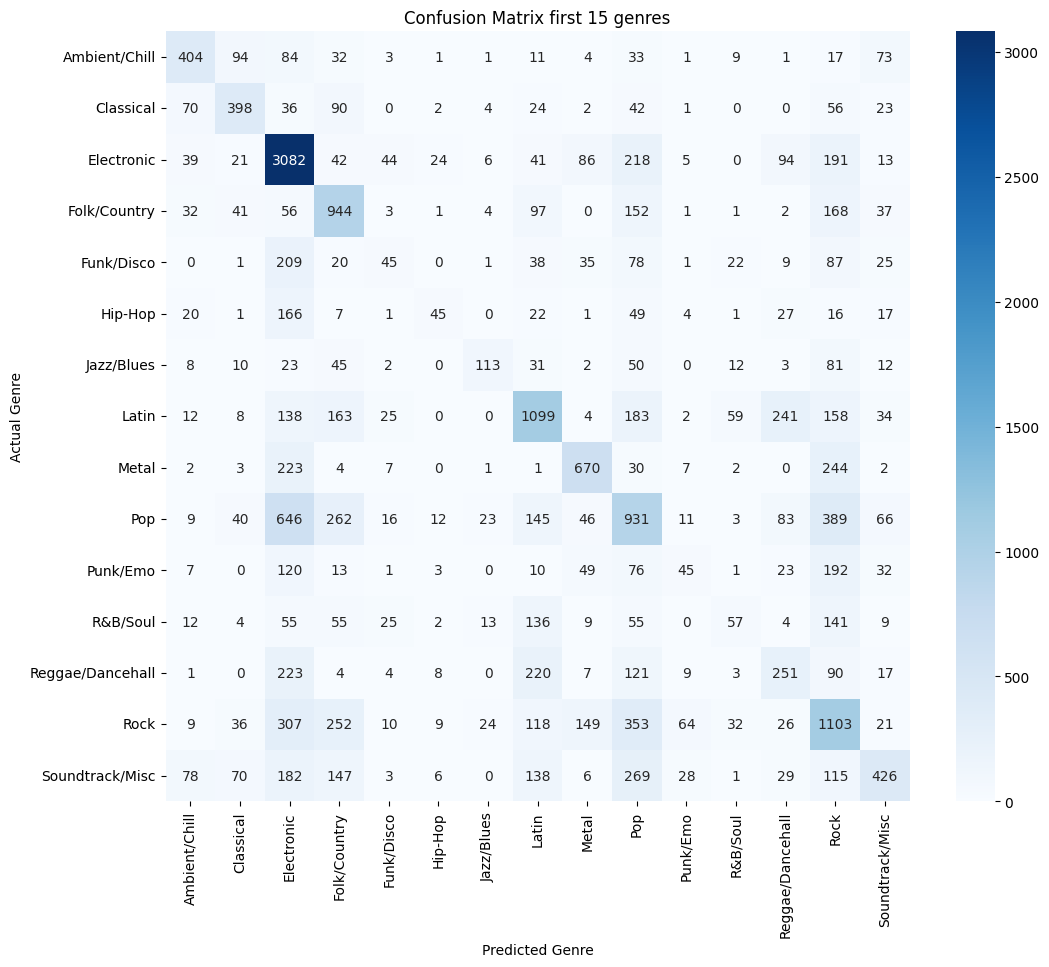

In [6]:
# generating a confusion matrix
cm=confusion_matrix(y_test,y_pred)
# only printing first 5 genres for easy readability
plt.figure(figsize=(12,10))
sns.heatmap(cm[:15,:15],annot=True,fmt='d',cmap='Blues',
            xticklabels=label_encoder.classes_[:15],
            yticklabels=label_encoder.classes_[:15])
plt.title('Confusion Matrix first 15 genres')
plt.ylabel('Actual Genre')
plt.xlabel('Predicted Genre')
plt.savefig('../visualizations/confusion_matrix.png',bbox_inches='tight')
plt.show()

### Saving the trained data

In [7]:
output_path='../data/trained_dataset.csv'
# index=False prevents pandas from writing dataframe index as coloumn
df_simplified.to_csv(output_path,index=False)
print('Successfully saved the training data to ',output_path)

Successfully saved the training data to  ../data/trained_dataset.csv


# Exploratory Data Analysis (EDA)

### Importing the libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and preparing the data

In [9]:
# setting styles for seaborn plots
sns.set(style="whitegrid")
# loading the trained dataset
trained_data=pd.read_csv('../data/trained_dataset.csv')
trained_df=pd.DataFrame(trained_data)
# displaying first 5 rows
print(trained_df.head(5))

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


### Initial inspection and description of data

In [10]:
# description of dataset
print('Descibing\n', trained_df.describe(), '\n')
# information of dataset
print('Info\n', trained_df.info(), '\n')

Descibing
           Unnamed: 0     popularity   duration_ms   danceability  \
count  113999.000000  113999.000000  1.139990e+05  113999.000000   
mean    56999.421925      33.238827  2.280312e+05       0.566801   
std     32909.243463      22.304959  1.072961e+05       0.173543   
min         0.000000       0.000000  8.586000e+03       0.000000   
25%     28499.500000      17.000000  1.740660e+05       0.456000   
50%     56999.000000      35.000000  2.129060e+05       0.580000   
75%     85499.500000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        0.641383       5.309126      -8.258950       0.637558   
std         0.251530       3.559999       5.029357       0.480708   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.00

### Check for missing data if any

Missing values per column: 
Series([], dtype: int64)


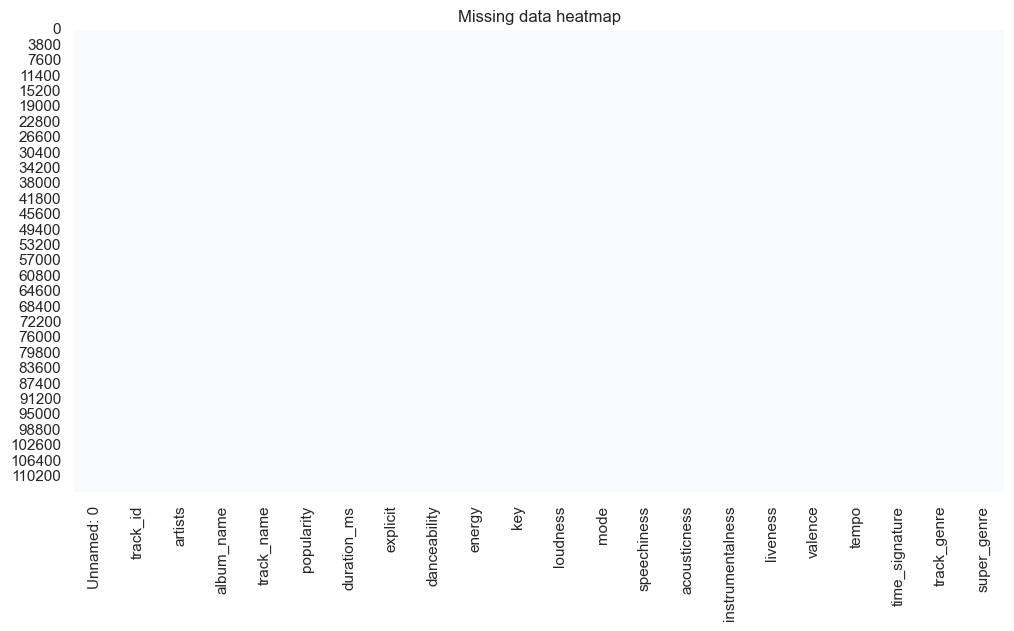

In [11]:
# getting sum of null values for each column
missing_values=trained_df.isnull().sum()
print("Missing values per column: ")
print(missing_values[missing_values>0])
# visualizing null values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(trained_df.isnull(),cbar=False,cmap='Blues')
plt.title("Missing data heatmap")
plt.savefig('../visualizations/missing_data_heatmap.png',bbox_inches='tight')
plt.show()

### Univariate Analysis

#### a. Numerical Variable: Histogram

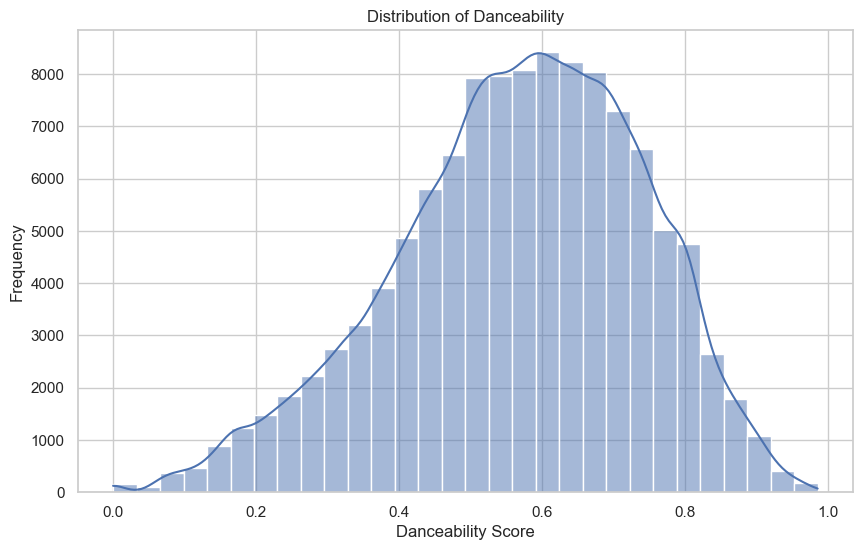

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(trained_df['danceability'],kde=True,bins=30)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability Score')
plt.ylabel('Frequency')
plt.savefig('../visualizations/01_distribution_of_danceability_histogram.png',bbox_inches='tight')
plt.show()

#### b. Numerical Variable: Box Plot

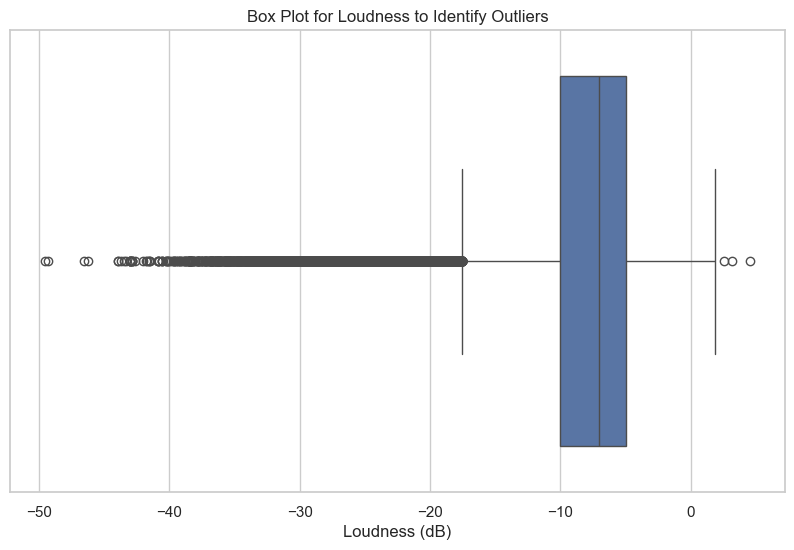

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x=trained_df['loudness'])
plt.title('Box Plot for Loudness to Identify Outliers')
plt.xlabel('Loudness (dB)')
plt.savefig('../visualizations/02_box_plot_for_loudness_to_identity_outliers.png',bbox_inches='tight')
plt.show()

#### c. Categorical Variable: Count Plot

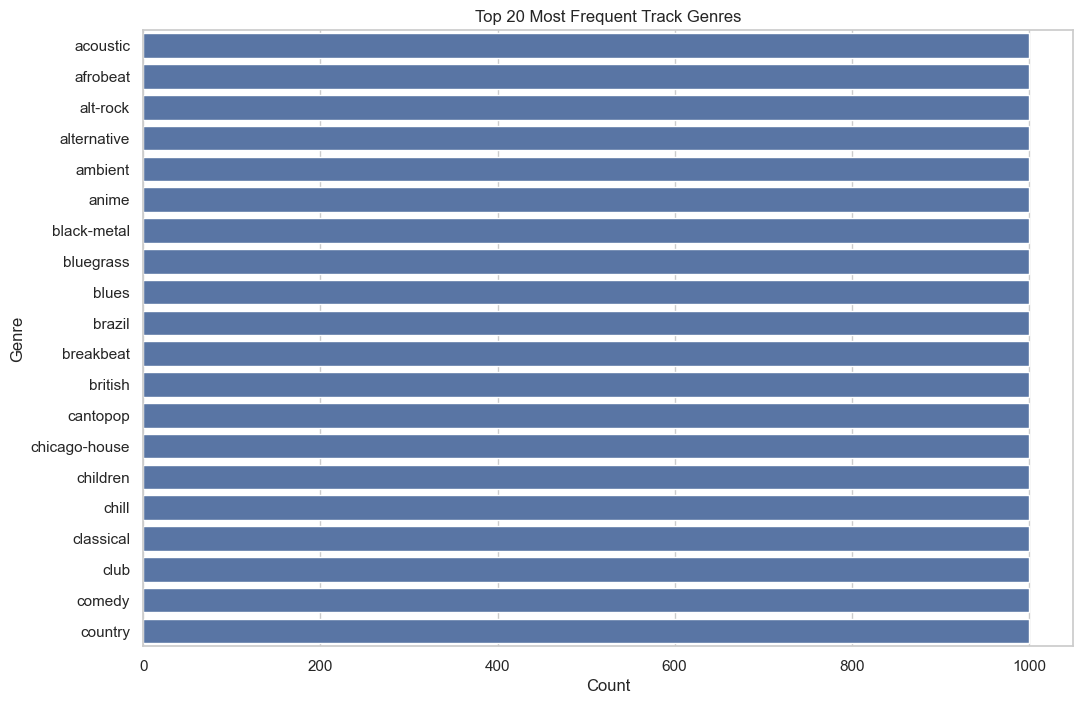

In [14]:
# getting top 20 genres
top_20_genres=trained_df['track_genre'].value_counts().nlargest(20).index
trained_df_top_20=trained_df[trained_df['track_genre'].isin(top_20_genres)]
plt.figure(figsize=(12,8))
sns.countplot(y='track_genre',data=trained_df_top_20,order=top_20_genres)
plt.title('Top 20 Most Frequent Track Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.savefig('../visualizations/03_top_20_most_frequent_track_genres.png', bbox_inches='tight')
plt.show()

### Bivariate/Multivariate Analysis

#### a. Numerical vs. Numerical: Scatter Plot

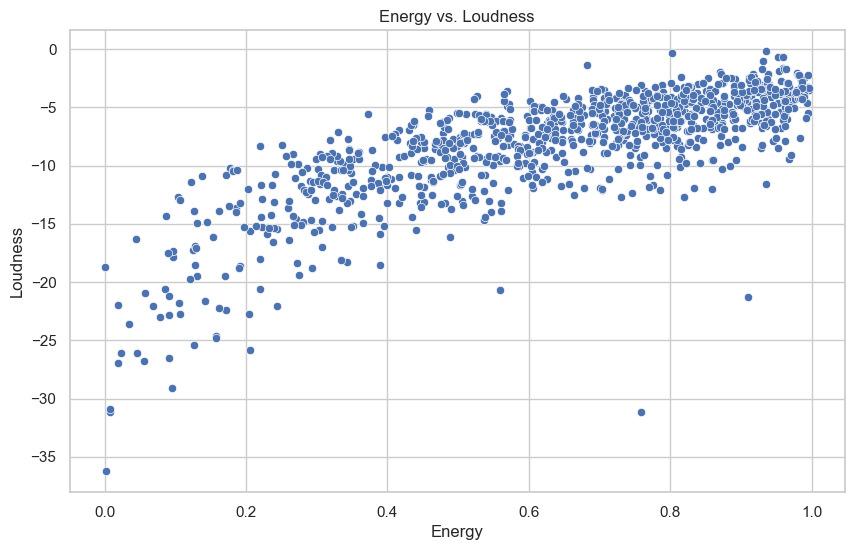

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='energy',y='loudness',data=trained_df.sample(1000)) # sample 1000 points for a faster plot
plt.title('Energy vs. Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.savefig('../visualizations/04_energy_vs_loudness.png',bbox_inches='tight')
plt.show()

#### b. Numerical vs. Numerical: Correlation Heatmap

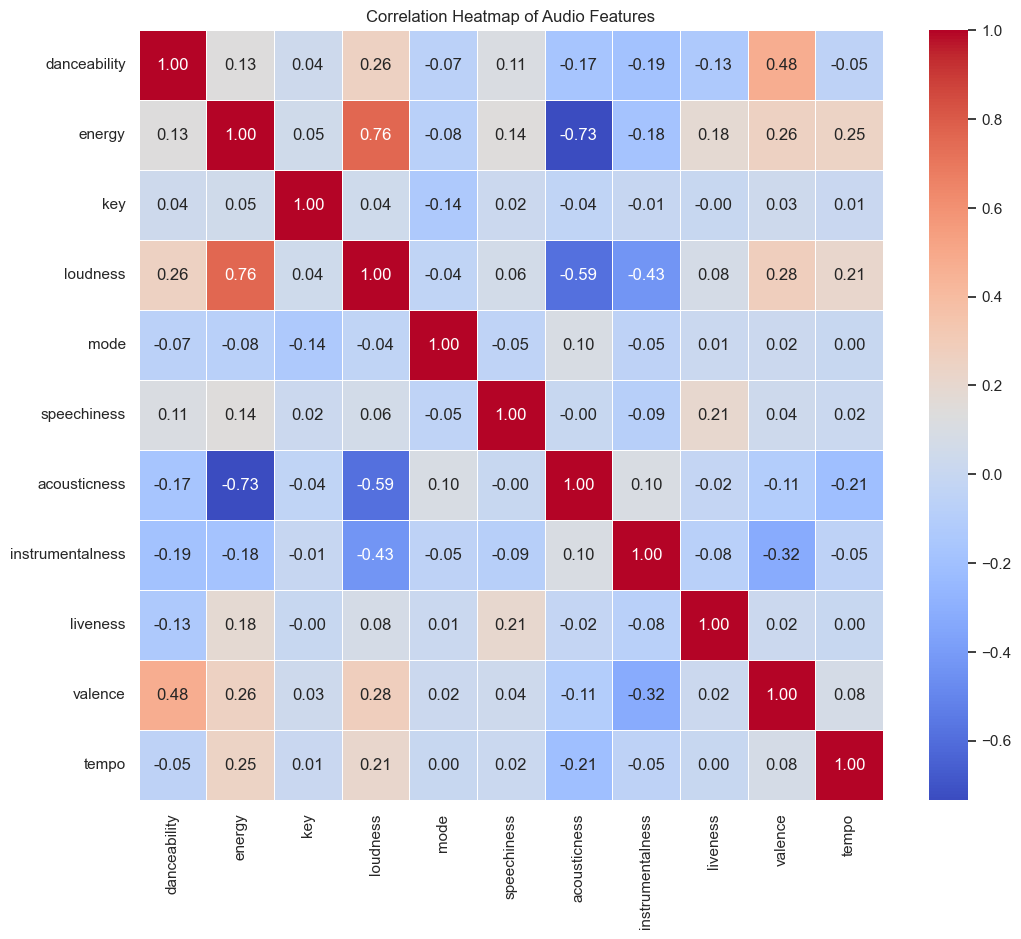

In [16]:
# selecting only numerical columns for the correlation matrix
numerical_cols=trained_df.select_dtypes(include=['float64', 'int64']).columns
# dropping coloumns that are not features
not_features=['danceability','energy','key','loudness','mode','speechiness',
              'acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
corr_matrix=trained_df[features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.savefig('../visualizations/05_correlation_heatmap_of_audio_features.png',bbox_inches='tight')
plt.show()

#### c. Categorical vs. Numerical: Box Plot

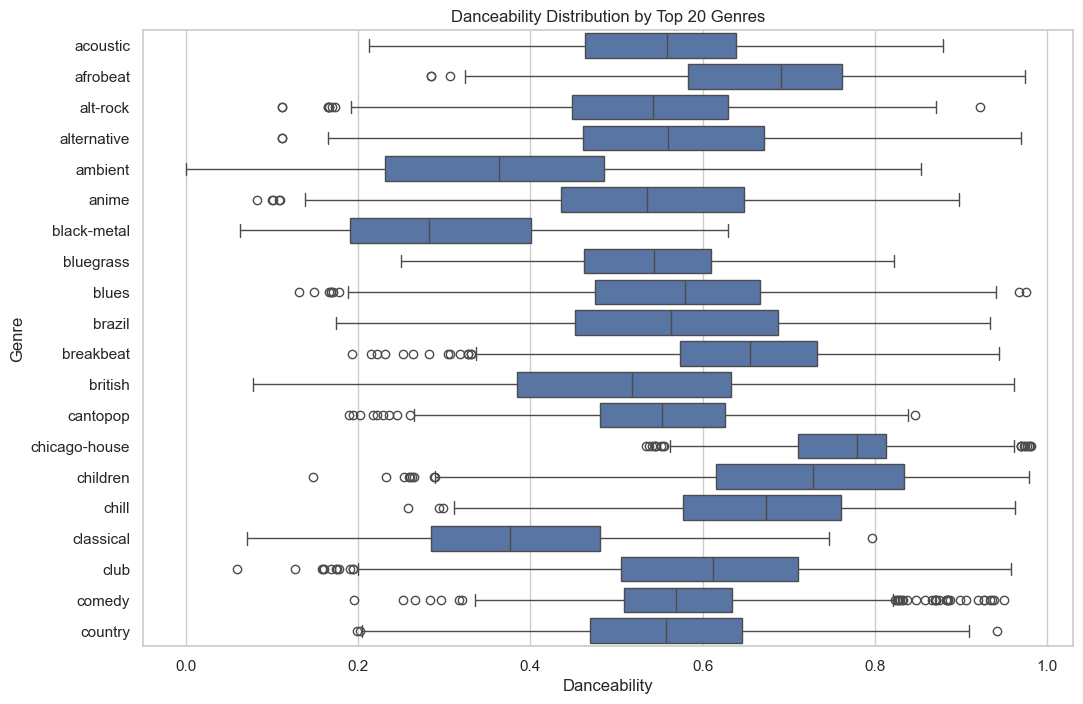

In [17]:
# using same top_20_genres from our countplot
plt.figure(figsize=(12,8))
sns.boxplot(x='danceability',y='track_genre',data=trained_df_top_20,order=top_20_genres)
plt.title('Danceability Distribution by Top 20 Genres')
plt.xlabel('Danceability')
plt.ylabel('Genre')
plt.savefig('../visualizations/06_danceability_distribution_by_top_20_genres.png',bbox_inches='tight')
plt.show()

# YouTube Music Recommendations System

### Importing the libraries

In [18]:
import pandas as pd
from ytmusicapi import YTMusic
from thefuzz import process, fuzz
from thefuzz.fuzz import WRatio
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
import re
import traceback
import matplotlib.pyplot as plt
import seaborn as sns

### Configuration

In [19]:
trained_dataset=pd.read_csv('../data/trained_dataset.csv')
trained_dataset_df=pd.DataFrame(trained_dataset)
features=['danceability','energy','key','loudness','mode','speechiness',
          'acousticness','instrumentalness','liveness','valence','tempo']
no_of_recommendations=5
constrain_by_genre=True
minimum_match_score=88

### Preparing the dataset for recommendations

In [20]:
# filling missing values if any and dropping duplicates
trained_dataset_df=trained_dataset_df.drop_duplicates(subset=['track_name','artists'],keep='first').reset_index(drop=True)
trained_dataset_df_features=trained_dataset_df[features].fillna(0)
# creating string search for fuzzy match
trained_dataset_df['search_string']=trained_dataset_df['track_name']+' '+trained_dataset_df['artists']
# preparing features for ML using standard scaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(trained_dataset_df_features)

### Recommendations from YouTube Music URL function

In [21]:
def youtube_music_recommender(youtube_url):
    try:
        # fetching youtube music metadata
        print(f"\nFetching song data from YouTube...")
        video_id = youtube_url.split('v=')[-1].split('&')[0]
        # suppress warnings from ytmusicapi
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            ytm = YTMusic()
            song_data = ytm.get_song(videoId=video_id)
        yt_title = song_data['videoDetails']['title']
        yt_artist = song_data['videoDetails']['author']
        yt_search_query = f"{yt_title} {yt_artist}"
        print(f"Input song: {yt_title} by {yt_artist}")
        # looking for song in trained dataset
        print("Searching for the song in your dataset...")
        # Use a more robust scorer (WRatio) and our higher threshold
        best_match = process.extractOne(
            yt_search_query, 
            trained_dataset_df['search_string'], 
            scorer=fuzz.WRatio
        )
        match_index = best_match[2] # The index of the best-matching row
        match_score = best_match[1] # The similarity score (0-100)
        if match_score < minimum_match_score:
            print(f"Sorry, I couldn't find a confident match for this song in the dataset.")
            print(f"(Best try: '{best_match[0]}' with score {match_score}%)")
            return
        seed_song = trained_dataset_df.iloc[match_index]
        seed_genre = seed_song['super_genre']
        print(f"Found match (Score: {match_score}%): {seed_song['track_name']} by {seed_song['artists']} (Genre: {seed_genre})")
        # This is the pool of songs we will search for recommendations
        pool_df = trained_dataset_df
        pool_X_scaled = x_scaled
        pool_seed_index = match_index # The index of our seed song IN THE POOL
        if constrain_by_genre:
            print(f"Constraining recommendations to '{seed_genre}' genre...")
            # Filter the DataFrame and feature matrix to ONLY this genre
            genre_indices = trained_dataset_df[trained_dataset_df['super_genre'] == seed_genre].index
            if len(genre_indices) <= no_of_recommendations:
                print("Not enough songs in this genre to make a recommendation.")
                return
            pool_df = trained_dataset_df.loc[genre_indices].reset_index(drop=True)
            pool_x_scaled = x_scaled[genre_indices]
            # Find the new index of our seed song in this filtered pool
            # This is a bit tricky, but it works
            pool_seed_index = pool_df[pool_df['search_string'] == seed_song['search_string']].index[0]
        # Get the scaled feature vector for your seed song from the correct pool
        seed_vector = pool_x_scaled[pool_seed_index].reshape(1, -1)
        # NEW: Use Cosine Similarity (from -1 to 1, where 1 is a perfect match)
        # This finds songs with a similar *profile* of features
        similarities = cosine_similarity(seed_vector, pool_x_scaled)[0]
        # Get the indices of the songs with the highest similarity
        # We sort by similarity DESCENDING and get top N+1
        # [::-1] reverses the sorted array
        top_indices = similarities.argsort()[::-1]
        # Find the *actual* recommendation indices (skipping the song itself)
        recommendation_indices = []
        for idx in top_indices:
            if idx == pool_seed_index:
                continue # Skip the song itself
            recommendation_indices.append(idx)
            if len(recommendation_indices) >= no_of_recommendations:
                break # We have enough        
        # Get the recommended songs from our pool DataFrame
        recommendations = pool_df.iloc[recommendation_indices]
        print("\n--- HERE ARE YOUR RECOMMENDATIONS ---")
        for i, (idx, song) in enumerate(recommendations.iterrows()):
            # Get the similarity score for this specific song
            sim_score = similarities[idx]
            print(f"#{i+1}: {song['track_name']} by {song['artists']}")
            print(f"   (Genre: {song['super_genre']}, Similarity: {sim_score:.4f})")
    except Exception as e:
        print(f"\nAn error occurred: {e}")
        print("Please check if the YouTube Music URL is correct, public, and an actual song.")

In [22]:
yt_music_url=input("Enter YouTube Music URL- ")
youtube_music_recommender(yt_music_url)

Enter YouTube Music URL-  https://music.youtube.com/watch?v=bSnlKl_PoQU&si=IQL7ucUTLgIVYg0s



Fetching song data from YouTube...
Input song: Bohemian Rhapsody by Queen
Searching for the song in your dataset...
Found match (Score: 100%): Bohemian Rhapsody by Queen (Genre: Rock)
Constraining recommendations to 'Rock' genre...

--- HERE ARE YOUR RECOMMENDATIONS ---
#1: Flying - Remastered by Anathema
   (Genre: Rock, Similarity: 0.9323)
#2: Una Copa de Champagne by Angelica Maria
   (Genre: Rock, Similarity: 0.9158)
#3: Holiday (2015 - Remaster) by Scorpions
   (Genre: Rock, Similarity: 0.9098)
#4: She's Gone by STEELHEART
   (Genre: Rock, Similarity: 0.9031)
#5: Abbas by Gaye Su Akyol
   (Genre: Rock, Similarity: 0.8936)


# Project Credits-
### Aarush Chaudhary - 70572400148
### Paridhi Talreja - 70572400152